# Data collection

In [151]:
import pandas as pd
import spotipy
from lyricsgenius import Genius
from spotipy.oauth2 import SpotifyClientCredentials
cid ='37de602a7103451bbee4968209af0d87'
secret ='bd2179cfafdb4acbb4b53937511e8194'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [178]:
# play list 1
# fetching tracks
# alphanero = sp.playlist_tracks("6huVSQyjyCLjt7Rd78ATDT")
alphanero = sp.playlist_tracks("06shUUYFod2ETqfm1OOOgj")
# alphanero = sp.playlist_tracks("425wcIeR4mCzenBqnPVFjv")


In [179]:
rows = []
count = 0

for track in alphanero['items']:
    song_details = track['track']
    features = [
            song_details['id'],
            song_details['uri'],
            song_details['name'],
            song_details['album']['artists'][0]['name'],
            song_details['duration_ms'],
            song_details['explicit'],
            song_details['track_number'],
            song_details['album']['release_date'],
            song_details['popularity']
        ]
    rows.append(features)
    count += 1

In [180]:
playlist_df = pd.DataFrame(rows, columns=["id", "uri", "title", "artist", "duration_ms", "explicit", "track_number", "release_date", "popularity"])
playlist_df.head()

,id,uri,title,artist,duration_ms,explicit,track_number,release_date,popularity
0,4wCD0qOFNRu1Q6O3N6ycm4,spotify:track:4wCD0qOFNRu1Q6O3N6ycm4,Crush,David Archuleta,213520,False,1,2008-11-11,67
1,4w1lzcaoZ1IC2K5TwjalRP,spotify:track:4w1lzcaoZ1IC2K5TwjalRP,A Thousand Miles,Vanessa Carlton,237493,False,3,2002-04-30,77
2,21pL95f63XT8Mezt8qPOtq,spotify:track:21pL95f63XT8Mezt8qPOtq,What Are Words (feat. Peter Hollens & Evynne H...,Lauren Christy,218000,False,1,2015-05-13,42
3,7w0CEIlW8kcomXPgxQ55Hj,spotify:track:7w0CEIlW8kcomXPgxQ55Hj,I Will Be Here,Steven Curtis Chapman,268533,False,5,1989-01-01,54
4,10M2Ex445zw585Ducldzkw,spotify:track:10M2Ex445zw585Ducldzkw,In Case You Didn't Know,Brett Young,224853,False,4,2017-02-10,75


In [181]:
# getting additional information about the track
def get_track_info(df):
    count = 0
    danceability = []
    energy = []
    key = []
    loudness = []
    speechiness = []
    acousticness = []
    instrumentalness = []
    liveness = []
    valence = []
    tempo = []
    mode = []
    uri = []
    for i in df['uri']:
        count += 1
        print(count, end = ' ')
        x = sp.audio_features(tracks=[i])[0]
        danceability.append(x['danceability'])
        energy.append(x['energy'])
        key.append(x['key'])
        loudness.append(x['loudness'])
        speechiness.append(x['speechiness'])
        acousticness.append(x['acousticness'])
        instrumentalness.append(x['instrumentalness'])
        liveness.append(x['liveness'])
        valence.append(x['valence'])
        tempo.append(x['tempo'])
        mode.append(x['mode'])
        uri.append(i)
            
            
    df2 = pd.DataFrame({
    'uri': uri,
    'danceability':danceability,
    'energy':energy,
    'key':key,
    'loudness':loudness,
    'speechiness':speechiness,
    'acousticness':acousticness,
    'instrumentalness':instrumentalness,
    'liveness':liveness,
    'valence':valence,
    'mode': mode,
    'tempo':tempo})
    
    return df2

In [182]:
track_info = get_track_info(playlist_df)
track_info.head()

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 

,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,mode,tempo
0,spotify:track:4wCD0qOFNRu1Q6O3N6ycm4,0.570,0.664,0,-4.718,0.0322,0.00836,0.000012,0.0719,0.487,0,162.084
1,spotify:track:4w1lzcaoZ1IC2K5TwjalRP,0.560,0.825,11,-3.862,0.0379,0.32300,0.000000,0.1610,0.268,1,94.931
2,spotify:track:21pL95f63XT8Mezt8qPOtq,0.509,0.188,0,-11.506,0.0427,0.96500,0.000000,0.1670,0.363,1,125.616
3,spotify:track:7w0CEIlW8kcomXPgxQ55Hj,0.475,0.186,3,-15.576,0.0277,0.74900,0.000025,0.2850,0.248,1,101.366
4,spotify:track:10M2Ex445zw585Ducldzkw,0.607,0.536,10,-7.306,0.0305,0.38600,0.000000,0.1020,0.434,1,147.986


In [183]:
playist_df_joint = playlist_df.merge(track_info, how="left", left_on="uri", right_on="uri")
playist_df_joint

,id,uri,title,artist,duration_ms,explicit,track_number,release_date,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,mode,tempo
0,4wCD0qOFNRu1Q6O3N6ycm4,spotify:track:4wCD0qOFNRu1Q6O3N6ycm4,Crush,David Archuleta,213520,False,1,2008-11-11,67,0.570,0.6640,0,-4.718,0.0322,0.008360,0.000012,0.0719,0.487,0,162.084
1,4w1lzcaoZ1IC2K5TwjalRP,spotify:track:4w1lzcaoZ1IC2K5TwjalRP,A Thousand Miles,Vanessa Carlton,237493,False,3,2002-04-30,77,0.560,0.8250,11,-3.862,0.0379,0.323000,0.000000,0.1610,0.268,1,94.931
2,21pL95f63XT8Mezt8qPOtq,spotify:track:21pL95f63XT8Mezt8qPOtq,What Are Words (feat. Peter Hollens & Evynne H...,Lauren Christy,218000,False,1,2015-05-13,42,0.509,0.1880,0,-11.506,0.0427,0.965000,0.000000,0.1670,0.363,1,125.616
3,7w0CEIlW8kcomXPgxQ55Hj,spotify:track:7w0CEIlW8kcomXPgxQ55Hj,I Will Be Here,Steven Curtis Chapman,268533,False,5,1989-01-01,54,0.475,0.1860,3,-15.576,0.0277,0.749000,0.000025,0.2850,0.248,1,101.366
4,10M2Ex445zw585Ducldzkw,spotify:track:10M2Ex445zw585Ducldzkw,In Case You Didn't Know,Brett Young,224853,False,4,2017-02-10,75,0.607,0.5360,10,-7.306,0.0305,0.386000,0.000000,0.1020,0.434,1,147.986
5,3St0RlsL0Z0klK1mqWakQm,spotify:track:3St0RlsL0Z0klK1mqWakQm,If I Let You Go - Radio Edit,Westlife,221266,False,2,1999-11-01,69,0.581,0.6780,0,-4.242,0.0284,0.006690,0.000000,0.0807,0.677,1,181.991
6,6si71supnBUhddjR2FJc2L,spotify:track:6si71supnBUhddjR2FJc2L,White Flag,Dido,240040,False,1,2003,71,0.509,0.5370,5,-6.834,0.0384,0.347000,0.000007,0.0805,0.311,1,170.030
7,1wb4P4F0sxAQ2KXrRvsx6n,spotify:track:1wb4P4F0sxAQ2KXrRvsx6n,You're Still The One,Shania Twain,212200,False,10,1997-11-04,77,0.585,0.4940,3,-8.751,0.0353,0.363000,0.000000,0.0886,0.634,1,133.822
8,7dcTSq2HC4kzvcWFcSfJy1,spotify:track:7dcTSq2HC4kzvcWFcSfJy1,Lucky One,Amy Grant,249386,False,1,1994,29,0.505,0.7180,10,-4.878,0.0266,0.430000,0.000004,0.1760,0.744,1,185.804
9,0gcjc7Vt5xtcfmJgf6g2IO,spotify:track:0gcjc7Vt5xtcfmJgf6g2IO,When You Say Nothing At All,Ronan Keating,256825,False,6,2000-01-01,73,0.461,0.4480,7,-10.665,0.0246,0.161000,0.000001,0.0811,0.418,1,173.860


In [184]:
# get lyrics
genius = Genius("TytY5RJRmjijEPuQIhfpMmfWPwWh51Hwq2UZbWG_pu-NgVfxiZFWuBOF9-a9dO8GFz26qVuEKDisAbqShnlUeA", timeout=300)

In [185]:
import numpy as np
lyrics_set = []
for title, artist in zip(playist_df_joint.title, playist_df_joint.artist):
    try:
        search_info = genius.search_song(title=title, artist=artist)
        lyrics_set.append(search_info.lyrics)
    except Exception as e:
        print(e)
        lyrics_set.append(np.nan)

Searching for "Crush" by David Archuleta...
Done.
Searching for "A Thousand Miles" by Vanessa Carlton...
Done.
Searching for "What Are Words (feat. Peter Hollens & Evynne Hollens)" by Lauren Christy...
No results found for: 'What Are Words (feat. Peter Hollens & Evynne Hollens) Lauren Christy'
'NoneType' object has no attribute 'lyrics'
Searching for "I Will Be Here" by Steven Curtis Chapman...
Done.
Searching for "In Case You Didn't Know" by Brett Young...
Done.
Searching for "If I Let You Go - Radio Edit" by Westlife...
Done.
Searching for "White Flag" by Dido...
Done.
Searching for "You're Still The One" by Shania Twain...
Done.
Searching for "Lucky One" by Amy Grant...
Done.
Searching for "When You Say Nothing At All" by Ronan Keating...
Done.
Searching for "8 Letters" by Why Don't We...
Done.
Searching for "are you sure?" by Loote...
Done.
Searching for "Homesick" by Will Jay...
Done.
Searching for "I Knew I Loved You" by Savage Garden...
Done.
Searching for "This I Promise You" b

In [186]:
playist_df_joint['lyrics'] = lyrics_set
playist_df_joint

,id,uri,title,artist,duration_ms,explicit,track_number,release_date,popularity,danceability,...,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,mode,tempo,lyrics
0,4wCD0qOFNRu1Q6O3N6ycm4,spotify:track:4wCD0qOFNRu1Q6O3N6ycm4,Crush,David Archuleta,213520,False,1,2008-11-11,67,0.570,...,0,-4.718,0.0322,0.008360,0.000012,0.0719,0.487,0,162.084,"Crush Lyrics[Intro]\nOoh, whoa, whoa\nOh, oh\n..."
1,4w1lzcaoZ1IC2K5TwjalRP,spotify:track:4w1lzcaoZ1IC2K5TwjalRP,A Thousand Miles,Vanessa Carlton,237493,False,3,2002-04-30,77,0.560,...,11,-3.862,0.0379,0.323000,0.000000,0.1610,0.268,1,94.931,TranslationsFrançaisA Thousand Miles Lyrics[Pi...
2,21pL95f63XT8Mezt8qPOtq,spotify:track:21pL95f63XT8Mezt8qPOtq,What Are Words (feat. Peter Hollens & Evynne H...,Lauren Christy,218000,False,1,2015-05-13,42,0.509,...,0,-11.506,0.0427,0.965000,0.000000,0.1670,0.363,1,125.616,NaN
3,7w0CEIlW8kcomXPgxQ55Hj,spotify:track:7w0CEIlW8kcomXPgxQ55Hj,I Will Be Here,Steven Curtis Chapman,268533,False,5,1989-01-01,54,0.475,...,3,-15.576,0.0277,0.749000,0.000025,0.2850,0.248,1,101.366,I Will Be Here Lyrics[Verse 1]\nTomorrow morni...
4,10M2Ex445zw585Ducldzkw,spotify:track:10M2Ex445zw585Ducldzkw,In Case You Didn't Know,Brett Young,224853,False,4,2017-02-10,75,0.607,...,10,-7.306,0.0305,0.386000,0.000000,0.1020,0.434,1,147.986,In Case You Didn’t Know Lyrics[Verse 1]\nI can...
5,3St0RlsL0Z0klK1mqWakQm,spotify:track:3St0RlsL0Z0klK1mqWakQm,If I Let You Go - Radio Edit,Westlife,221266,False,2,1999-11-01,69,0.581,...,0,-4.242,0.0284,0.006690,0.000000,0.0807,0.677,1,181.991,If I Let You Go (Radio Edit) Lyrics[Verse 1]\n...
6,6si71supnBUhddjR2FJc2L,spotify:track:6si71supnBUhddjR2FJc2L,White Flag,Dido,240040,False,1,2003,71,0.509,...,5,-6.834,0.0384,0.347000,0.000007,0.0805,0.311,1,170.030,White Flag Lyrics[Verse 1]\nI know you think t...
7,1wb4P4F0sxAQ2KXrRvsx6n,spotify:track:1wb4P4F0sxAQ2KXrRvsx6n,You're Still The One,Shania Twain,212200,False,10,1997-11-04,77,0.585,...,3,-8.751,0.0353,0.363000,0.000000,0.0886,0.634,1,133.822,TranslationsBahasa IndonesiaYou’re Still the O...
8,7dcTSq2HC4kzvcWFcSfJy1,spotify:track:7dcTSq2HC4kzvcWFcSfJy1,Lucky One,Amy Grant,249386,False,1,1994,29,0.505,...,10,-4.878,0.0266,0.430000,0.000004,0.1760,0.744,1,185.804,Lucky One LyricsYou're the kind\nWhen you love...
9,0gcjc7Vt5xtcfmJgf6g2IO,spotify:track:0gcjc7Vt5xtcfmJgf6g2IO,When You Say Nothing At All,Ronan Keating,256825,False,6,2000-01-01,73,0.461,...,7,-10.665,0.0246,0.161000,0.000001,0.0811,0.418,1,173.860,TranslationsΕλληνικάWhen You Say Nothing At Al...


In [190]:
playist_df_joint.dropna(inplace=True)

In [191]:
playist_df_joint.to_csv('../Case study playlists/d_and_d.csv')

<AxesSubplot:>

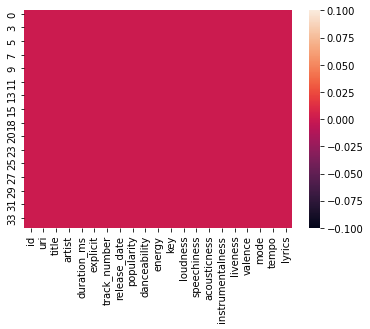

In [192]:
import seaborn as sns
sns.heatmap(playist_df_joint.isna())

In [165]:
import pandas as pd

In [193]:
spotify_caffine = pd.read_csv("../Case study playlists/spotify_caffine.csv")
d_and_d = pd.read_csv("../Case study playlists/d_and_d.csv")
tintin_toronto = pd.read_csv("../Case study playlists/tintin_toronto.csv")
d_and_d.drop('Unnamed: 0', axis=1, inplace=True)

In [194]:
spotify_caffine = spotify_caffine.iloc[:34]
tintin_toronto = tintin_toronto.iloc[:34]

In [195]:
# tintin_toronto.to_csv('../Case study playlists/tintin_toronto.csv', index=False)

In [196]:
# spotify_caffine.to_csv('../Case study playlists/spotify_caffine.csv', index=False)

In [ ]:
# Analyis